In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt
from scipy.stats import shapiro
from scipy.stats import stats

In [2]:
dff = pd.read_csv("housepricestrain.csv")
df = dff.copy()

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print ("In DataFrame: ", df.shape[0],"obs, and ", df.shape[1], "features" )

In DataFrame:  1460 obs, and  81 features


In [5]:
df.isnull().sum().sort_values(ascending = False)[0:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [7]:
numericdf = df.select_dtypes(exclude = ["object"])
numericdf.drop(["Id"], axis = 1 , inplace = True )

In [8]:
numericdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [9]:
numericdf.isna().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [10]:
numericdf["LotFrontage"].fillna((numericdf["LotFrontage"].median()), inplace = True)
numericdf["MasVnrArea"].fillna((numericdf["MasVnrArea"].median()), inplace = True)
numericdf["GarageYrBlt"].fillna((numericdf["GarageYrBlt"].median()), inplace = True)

In [11]:
print("Skewness: %f" % numericdf["SalePrice"].skew())
print("Kurtosis: %f" % numericdf["SalePrice"].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


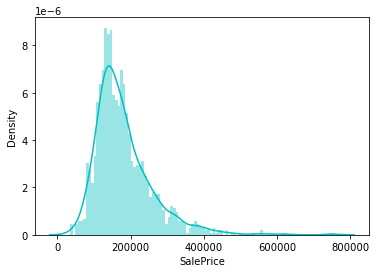

In [12]:
sns.distplot(numericdf["SalePrice"] , color = "c", bins = 100 , hist_kws={"alpha": 0.4});

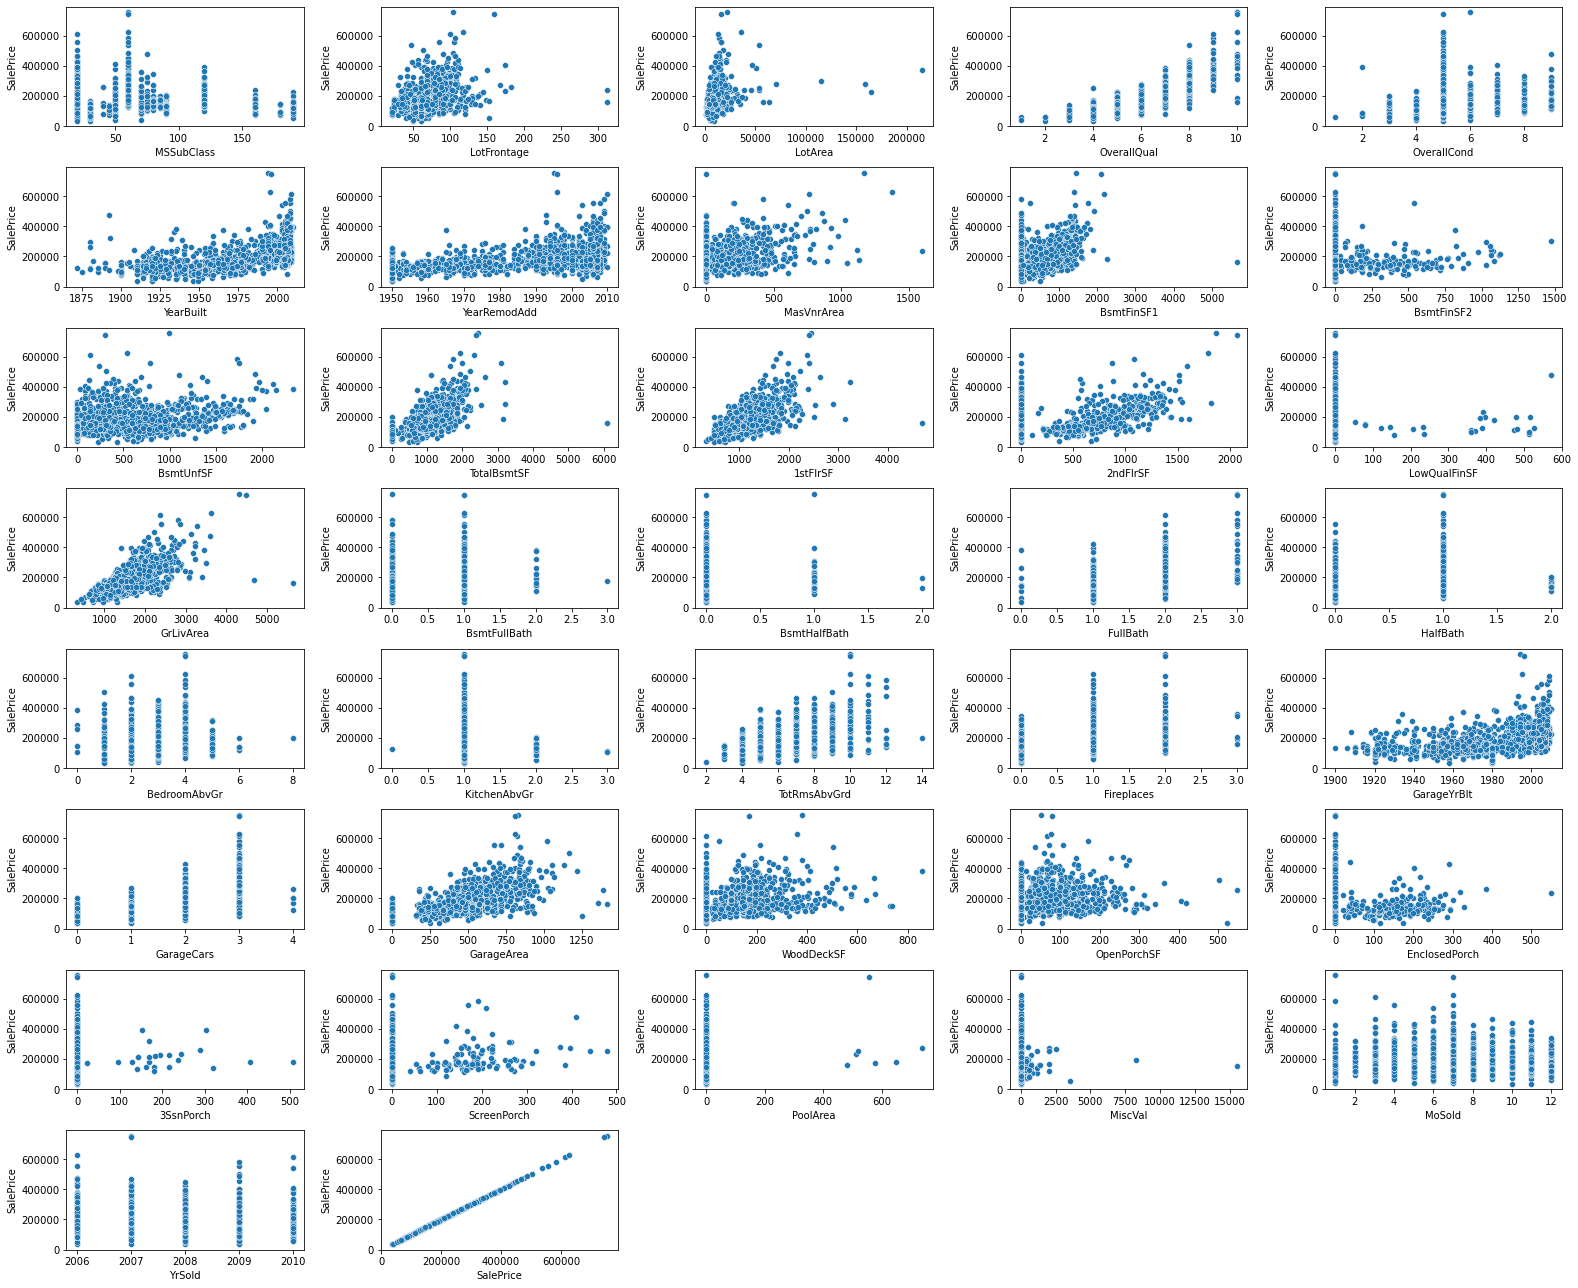

In [13]:
fg = plt.figure(figsize=(22,22))
for index in range(len(numericdf.columns)):
    plt.subplot(10 ,5 ,index + 1)
    sns.scatterplot(x = numericdf.iloc[:,index], y = "SalePrice", data = numericdf)
fg.tight_layout(pad = 1.0)

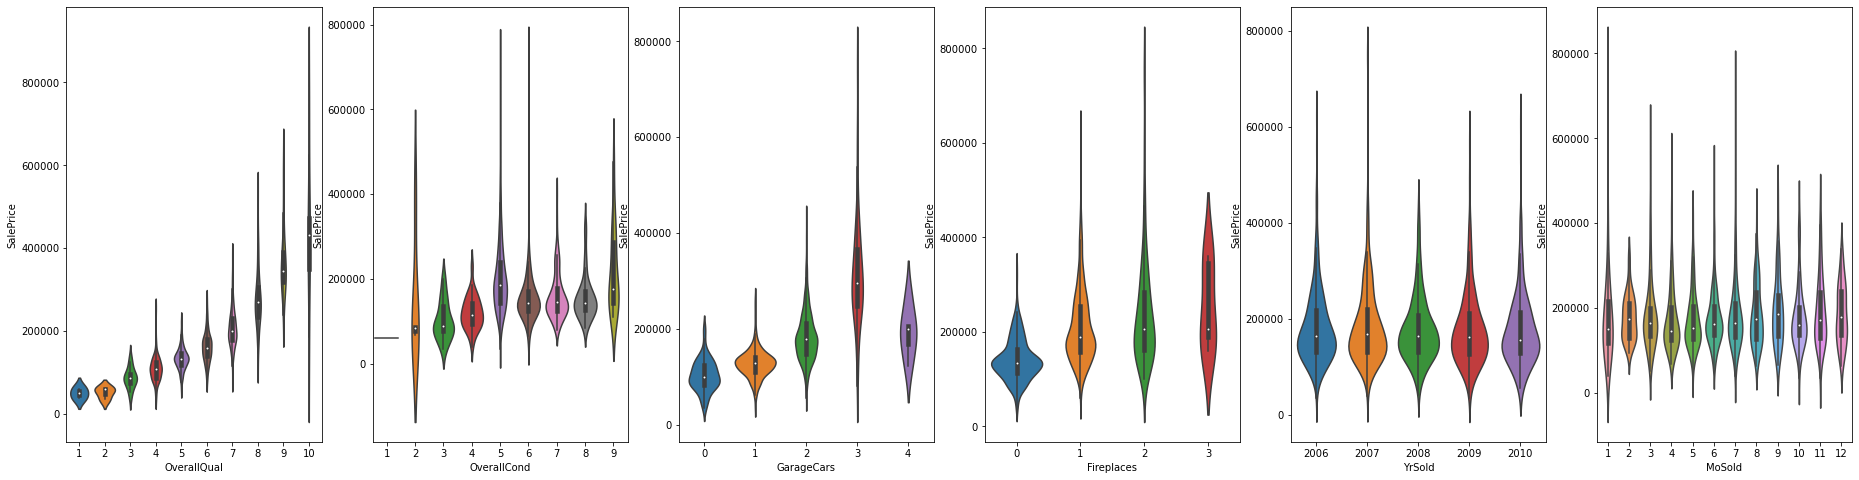

In [14]:
figure, ax = plt.subplots(1,6, figsize = (32,8))
sns.violinplot(data = numericdf, x = "OverallQual", y="SalePrice", ax = ax[0])
sns.violinplot(data = numericdf, x = "OverallCond", y="SalePrice", ax = ax[1])
sns.violinplot(data = numericdf, x = "GarageCars", y="SalePrice", ax = ax[2])
sns.violinplot(data = numericdf, x = "Fireplaces", y="SalePrice", ax = ax[3])
sns.violinplot(data = numericdf, x = "YrSold", y="SalePrice", ax = ax[4])
sns.violinplot(data = numericdf, x = "MoSold", y="SalePrice", ax = ax[5])
plt.show()

In [15]:
numericdf.corr()["SalePrice"].nlargest(20)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
Fireplaces      0.466929
GarageYrBlt     0.466754
BsmtFinSF1      0.386420
LotFrontage     0.334771
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
Name: SalePrice, dtype: float64

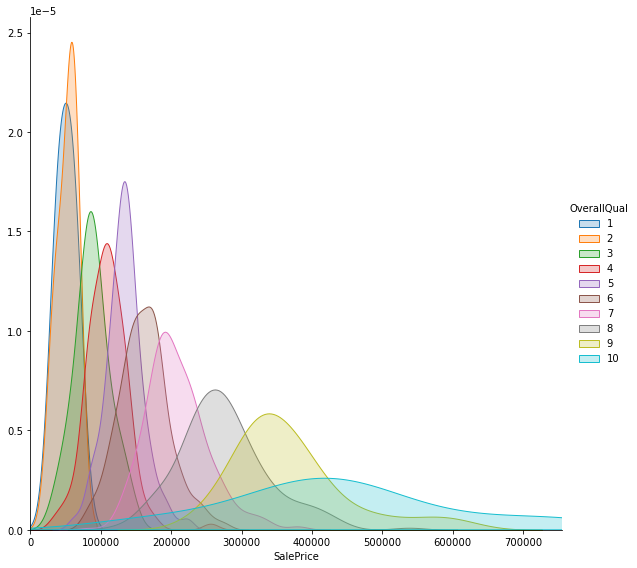

In [16]:
(sns.FacetGrid(numericdf,
              hue = "OverallQual",
              height = 8,
              xlim = (0, numericdf["SalePrice"].max()))
.map(sns.kdeplot, "SalePrice", shade = True)
.add_legend());

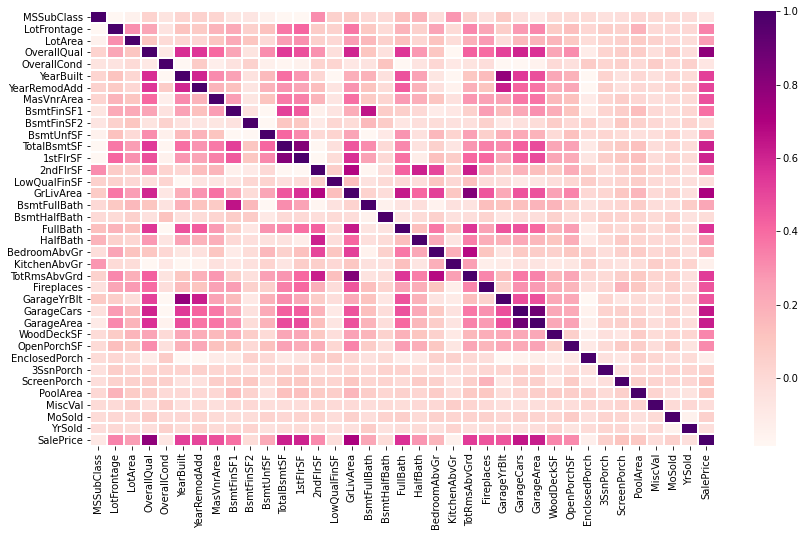

In [17]:
plt.figure(figsize = (14,8))
sns.heatmap(numericdf.corr(),
            cmap = "RdPu" ,
            annot = False ,
            linewidths = 1 ,
            robust = True);

In [18]:
for i in numericdf :
    test_statistics, pvalue = shapiro(numericdf[i])
    print(f"Shapiro Test Statistics for {i}: = {test_statistics:.4f}, P-value = { pvalue:.5f}")

Shapiro Test Statistics for MSSubClass: = 0.8046, P-value = 0.00000
Shapiro Test Statistics for LotFrontage: = 0.8502, P-value = 0.00000
Shapiro Test Statistics for LotArea: = 0.3511, P-value = 0.00000
Shapiro Test Statistics for OverallQual: = 0.9480, P-value = 0.00000
Shapiro Test Statistics for OverallCond: = 0.8289, P-value = 0.00000
Shapiro Test Statistics for YearBuilt: = 0.9256, P-value = 0.00000
Shapiro Test Statistics for YearRemodAdd: = 0.8628, P-value = 0.00000
Shapiro Test Statistics for MasVnrArea: = 0.6376, P-value = 0.00000
Shapiro Test Statistics for BsmtFinSF1: = 0.8480, P-value = 0.00000
Shapiro Test Statistics for BsmtFinSF2: = 0.3273, P-value = 0.00000
Shapiro Test Statistics for BsmtUnfSF: = 0.9304, P-value = 0.00000
Shapiro Test Statistics for TotalBsmtSF: = 0.9174, P-value = 0.00000
Shapiro Test Statistics for 1stFlrSF: = 0.9269, P-value = 0.00000
Shapiro Test Statistics for 2ndFlrSF: = 0.7668, P-value = 0.00000
Shapiro Test Statistics for LowQualFinSF: = 0.0980,

In [19]:
for i in numericdf:
    test_statistics, pvalue = stats.spearmanr(numericdf[i],numericdf["SalePrice"])
    print(f"Spearman-Correlation Coefficient for {i}: = {test_statistics:.4f}, P-value = { pvalue:.5f}")

Spearman-Correlation Coefficient for MSSubClass: = 0.0072, P-value = 0.78364
Spearman-Correlation Coefficient for LotFrontage: = 0.3756, P-value = 0.00000
Spearman-Correlation Coefficient for LotArea: = 0.4565, P-value = 0.00000
Spearman-Correlation Coefficient for OverallQual: = 0.8098, P-value = 0.00000
Spearman-Correlation Coefficient for OverallCond: = -0.1293, P-value = 0.00000
Spearman-Correlation Coefficient for YearBuilt: = 0.6527, P-value = 0.00000
Spearman-Correlation Coefficient for YearRemodAdd: = 0.5712, P-value = 0.00000
Spearman-Correlation Coefficient for MasVnrArea: = 0.4159, P-value = 0.00000
Spearman-Correlation Coefficient for BsmtFinSF1: = 0.3019, P-value = 0.00000
Spearman-Correlation Coefficient for BsmtFinSF2: = -0.0388, P-value = 0.13832
Spearman-Correlation Coefficient for BsmtUnfSF: = 0.1852, P-value = 0.00000
Spearman-Correlation Coefficient for TotalBsmtSF: = 0.6027, P-value = 0.00000
Spearman-Correlation Coefficient for 1stFlrSF: = 0.5754, P-value = 0.0000

In [20]:
for i in numericdf:
    test_statistics, pvalue = stats.kendalltau(numericdf[i],numericdf["SalePrice"])
    print(f"KendallTau-Correlation Coefficient for {i}: = {test_statistics:.4f}, P-value = { pvalue:.5f}")

KendallTau-Correlation Coefficient for MSSubClass: = -0.0040, P-value = 0.83369
KendallTau-Correlation Coefficient for LotFrontage: = 0.2672, P-value = 0.00000
KendallTau-Correlation Coefficient for LotArea: = 0.3142, P-value = 0.00000
KendallTau-Correlation Coefficient for OverallQual: = 0.6697, P-value = 0.00000
KendallTau-Correlation Coefficient for OverallCond: = -0.1035, P-value = 0.00000
KendallTau-Correlation Coefficient for YearBuilt: = 0.4710, P-value = 0.00000
KendallTau-Correlation Coefficient for YearRemodAdd: = 0.4130, P-value = 0.00000
KendallTau-Correlation Coefficient for MasVnrArea: = 0.3172, P-value = 0.00000
KendallTau-Correlation Coefficient for BsmtFinSF1: = 0.2209, P-value = 0.00000
KendallTau-Correlation Coefficient for BsmtFinSF2: = -0.0307, P-value = 0.13995
KendallTau-Correlation Coefficient for BsmtUnfSF: = 0.1275, P-value = 0.00000
KendallTau-Correlation Coefficient for TotalBsmtSF: = 0.4350, P-value = 0.00000
KendallTau-Correlation Coefficient for 1stFlrSF:

In [21]:
##end